**Assignment:**
Consider a maze as shown below.
 

*   Each empty tile represents a separate node in the graph.
*   There are maximum of four possible actions i.e., to move up, down left or right on any given tile/node.

Using BFS, find out how to get out of the maze if you’re in the start position depicted below.


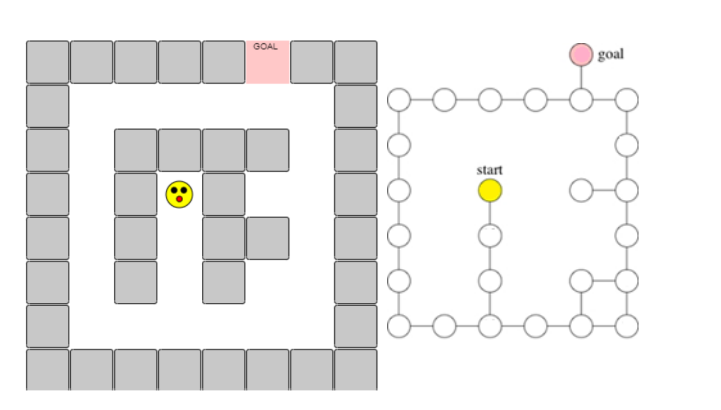

In [1]:
maze = [
    ['X', 'X', 'X', 'X', 'X', '.', 'X', 'X'],
    ['X', '.', '.', '.', '.', '.', '.', 'X'],
    ['X', '.', 'X', 'X', 'X', 'X', '.', 'X'],
    ['X', '.', 'X', '.', 'X', '.', '.', 'X'],
    ['X', '.', 'X', '.', 'X', 'X', '.', 'X'],
    ['X', '.', 'X', '.', 'X', '.', '.', 'X'],
    ['X', '.', '.', '.', '.', '.', '.', 'X'],
    ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
]

# Define the starting and ending positions
start_pos = (3, 3)
end_pos = (0, 5)

# Create a dictionary to store the graph
graph = {}

# Loop through each tile in the maze
for i in range(len(maze)):
    for j in range(len(maze[0])):
        # Check if the tile is not a wall
        if maze[i][j] != 'X':
            # Add the tile to the graph with an empty set of neighbors
            graph[(i, j)] = set()
            # Check the neighbors of the tile
            if maze[i-1][j] != 'X':
                graph[(i, j)].add((i-1, j)) # Up
            if maze[i+1][j] != 'X':
                graph[(i, j)].add((i+1, j)) # Down
            if maze[i][j-1] != 'X':
                graph[(i, j)].add((i, j-1)) # Left
            if maze[i][j+1] != 'X':
                graph[(i, j)].add((i, j+1)) # Right
                
# Define the BFS function to find the shortest path from start_pos to end_pos
def bfs(graph, start_pos, end_pos):
    queue = [(start_pos, [start_pos])]
    visited = set([start_pos])
    while queue:
        (vertex, path) = queue.pop(0)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                if neighbor == end_pos:
                    return path + [neighbor]
                else:
                    queue.append((neighbor, path + [neighbor]))
                    
# # Call the BFS function to find the shortest path from start_pos to end_pos
# shortest_path = bfs(graph, start_pos, end_pos)

# # Print the shortest path
# print(shortest_path)

if start_pos not in graph:
    print("Invalid starting position")
else:
    shortest_path = bfs(graph, start_pos, end_pos)
    print(shortest_path)



[(3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (1, 5), (0, 5)]


In [2]:
def bfs(graph, start_pos, end_pos):
    queue = [(start_pos, [start_pos])]
    visited = set([start_pos])
    paths = []
    while queue:
        (vertex, path) = queue.pop(0)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                if neighbor == end_pos:
                    paths.append(path + [neighbor])
                else:
                    queue.append((neighbor, path + [neighbor]))
    return paths


In [3]:
# Call the BFS function to find all paths from start_pos to end_pos
paths = bfs(graph, start_pos, end_pos)

# Create a copy of the maze to mark the tiles that the paths go through
marked_maze = [row[:] for row in maze]

# Mark the tiles that the paths go through
for path in paths:
    for tile in path:
        marked_maze[tile[0]][tile[1]] = '*'

# Print the marked maze
for row in marked_maze:
    print(' '.join(row))


X X X X X * X X
X . . . . * * X
X . X X X X * X
X . X * X . * X
X . X * X X * X
X . X * X . * X
X . . * * * * X
X X X X X X X X


In [4]:
from collections import deque

# define the maze as a dictionary where the keys are the node positions and the values are the neighboring nodes
maze = {
    (0, 0): {(0, 1), (1, 0)},
    (0, 1): {(0, 0), (0, 2), (1, 1)},
    (0, 2): {(0, 1), (0, 3), (1, 2)},
    (0, 3): {(0, 2), (0, 4), (1, 3)},
    (0, 4): {(0, 3), (1, 4)},
    (1, 0): {(0, 0), (2, 0), (1, 1)},
    (1, 1): {(0, 1), (1, 0), (1, 2), (2, 1)},
    (1, 2): {(0, 2), (1, 1), (1, 3), (2, 2)},
    (1, 3): {(0, 3), (1, 2), (1, 4), (2, 3)},
    (1, 4): {(0, 4), (1, 3), (2, 4)},
    (2, 0): {(1, 0), (2, 1)},
    (2, 1): {(1, 1), (2, 0), (2, 2)},
    (2, 2): {(1, 2), (2, 1), (2, 3)},
    (2, 3): {(1, 3), (2, 2), (2, 4)},
    (2, 4): {(1, 4), (2, 3)}
}

# define the start and end positions
start_pos = (0, 0)
end_pos = (2, 4)

# define the possible moves (up, down, left, right)
moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# define a function to check if a position is valid (within the maze boundaries)
def is_valid_pos(pos):
    return 0 <= pos[0] < 3 and 0 <= pos[1] < 5

# define the BFS function to find the shortest path from start_pos to end_pos
def bfs(start_pos, end_pos):
    visited = set()
    queue = deque([(start_pos, [start_pos])])
    while queue:
        pos, path = queue.popleft()
        if pos == end_pos:
            return path
        if pos not in visited:
            visited.add(pos)
            for move in moves:
                new_pos = (pos[0] + move[0], pos[1] + move[1])
                if is_valid_pos(new_pos) and new_pos in maze[pos]:
                    queue.append((new_pos, path + [new_pos]))
    return None

# call the BFS function and print the result
path = bfs(start_pos, end_pos)
if path:
    print('Shortest path:', path)
else:
    print('No path found')


Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4)]
